In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

## Dataset
Illustrate scatter plots using iris dataset and ...

In [2]:
iris = sns.load_dataset('iris')
iris.shape
iris.head()

(150, 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## scatter plot to show 2D distribution
- Scatter plot can be used to visualize two dimensional distribution of data. Seaborn is really convenient and powerful to show distribution over different values of categories or types. Matplotlib needs more manually setting for that.


### Seaborn scatter plot
Seaborn integrates well with pandas DataFrame.
- Set categoru columns as hue to distinguish distribution for each group
- Automatically add legend
- can also specify a column for size

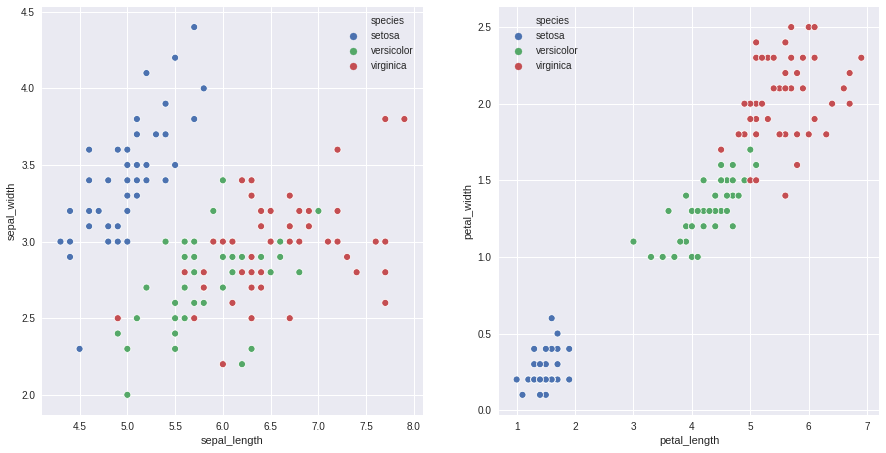

In [3]:
fig, axes = plt.subplots(1,2, figsize=(15, 7.5));
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[0]);
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=axes[1]);
#ax.set_title('iris');

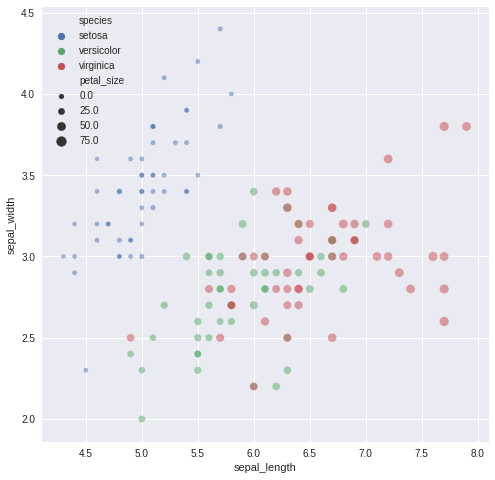

In [4]:
iris['petal_size'] = np.sqrt(iris.petal_length**2 + iris.petal_width**2)*10
ax = sns.scatterplot(data=iris, x='sepal_length', y='sepal_width',
                     hue='species', size='petal_size', alpha=0.5);
fig = plt.gcf()
fig.set_size_inches(8,8)

### Matplotlib scatter plot
Need to add more code to plot different color/size for each species category

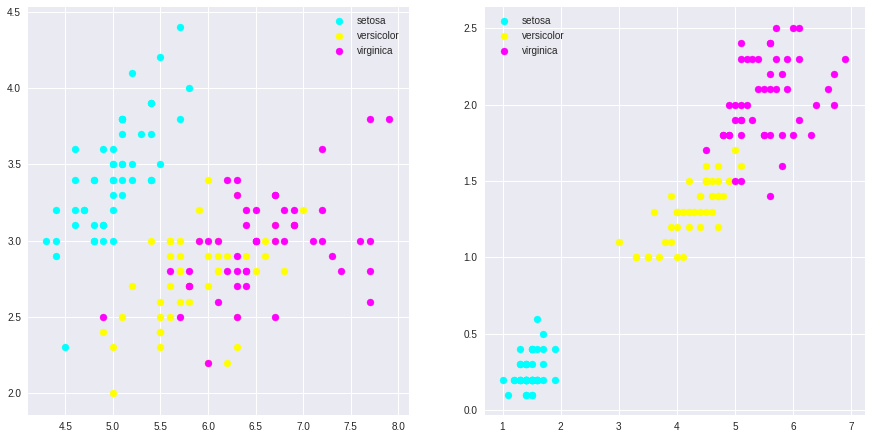

In [5]:
fig, axes = plt.subplots(1,2, figsize=(15, 7.5));
# marker, color setting
markers = ['.', '+', 'o', 's', 'd', '*', '^', 'v', '<', '>', '']
colors = ['cyan', 'yellow', 'magenta', 'blacks']
for ind, sp in enumerate(iris.species.unique()):
    # print(formats[ind], col)
    cluster = iris[iris.species == sp]
    axes[0].scatter(cluster.sepal_length, cluster.sepal_width, c=colors[ind], label=sp);
    axes[1].scatter(cluster.petal_length, cluster.petal_width, c=colors[ind], label=sp);
axes[0].legend(loc='best');
axes[1].legend(loc='best');

### Pandas scatter plot
Pandas scatter plot also needs to manually specify color/size for each category. Not very convenient.

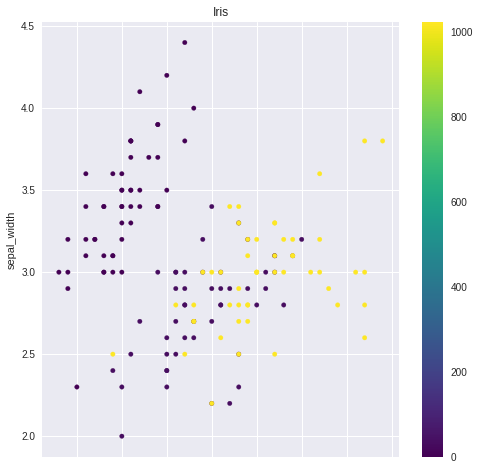

In [6]:
color_map = {'setosa': 0, 'versicolor': 32, 'virginica': 1024}
iris_color = iris.species.map(color_map)
ax = iris.plot.scatter(title='Iris', x='sepal_length', y='sepal_width', c=iris_color, cmap='viridis', figsize=(8, 8));

## Seaborn paired plot
paired plot over permutation of ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
- diagnal plots are kde distribution
- non diagnal plots are scatter plot

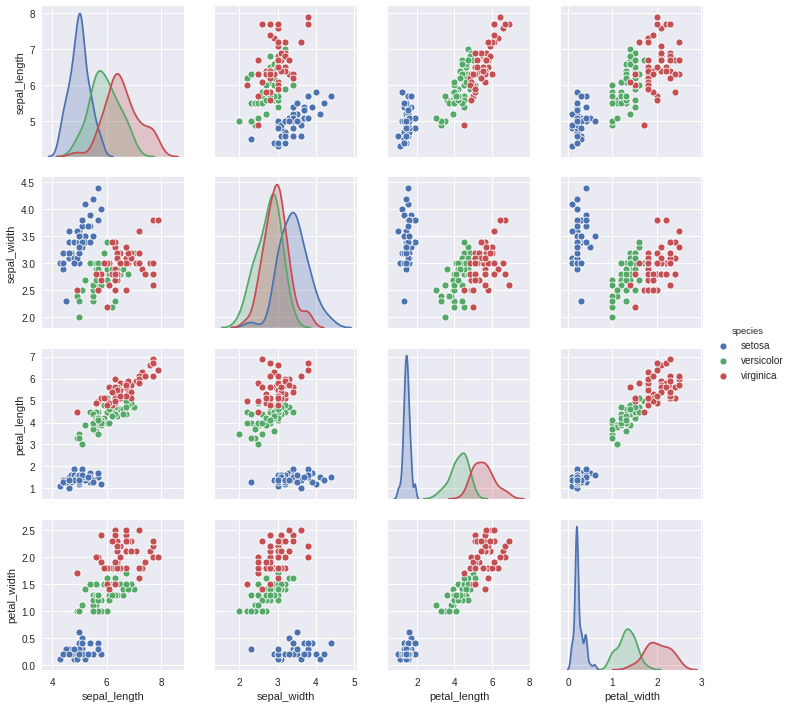

In [10]:
sns.pairplot(hue='species', data=iris.drop(columns='petal_size', errors='ignore'));